In [1]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [132]:
import pandas as pd
import numpy as np
from nltk.corpus import wordnet as wn
import gensim 
from gensim.models import Word2Vec 
from gensim.models import Doc2Vec 
import matplotlib.pyplot as plt

In [3]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

In [143]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english")) | {'due', 'unspecified', 'type'}
stop_words.remove('with')

In [123]:
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

In [148]:
df_train = pd.read_csv("data/diabetes/diab_train.csv", skiprows=0, header=None)
df_val = pd.read_csv("data/diabetes/diab_validation.csv", skiprows=0, header=None)
df_test = pd.read_csv("data/diabetes/diab_test.csv", skiprows=0, header=None)

In [151]:
X = np.hstack([np.asarray(df_train)[:,:-4], np.asarray(df_train)[:,-3:]])
X_val = np.hstack([np.asarray(df_val)[:,:-4], np.asarray(df_val)[:,-3:]])
X = np.hstack([np.asarray(df_test)[:,:-4], np.asarray(df_test)[:,-3:]])
Y = np.asarray(df_train)[:,-4]
Y_val = np.asarray(df_val)[:,-4]
Y_test = np.asarray(df_test)[:,-4]

In [128]:
diagnoses = []
X_diag = []

for x in X[1:, -3:]:
    diag = []
    for i in range(3):
        if str(x[i]) == 'nan': continue
        doc = []
        for w in tokenizer.tokenize(str(x[i])):
            if w not in stop_words:
                doc.append(w)
        diag.append(doc)
    diagnoses.append(diag)

In [129]:
words = {}

for diag in diagnoses:
    for d in diag:
        for w in d:
            if words.get(w) == None:
                words[w] = 0
            else:
                words[w] += 1

In [130]:
G = nx.DiGraph()

for diag in diagnoses:
    for d in diag:
        for i in range(len(d)-1):
            G.add_edge(d[i], d[i+1])

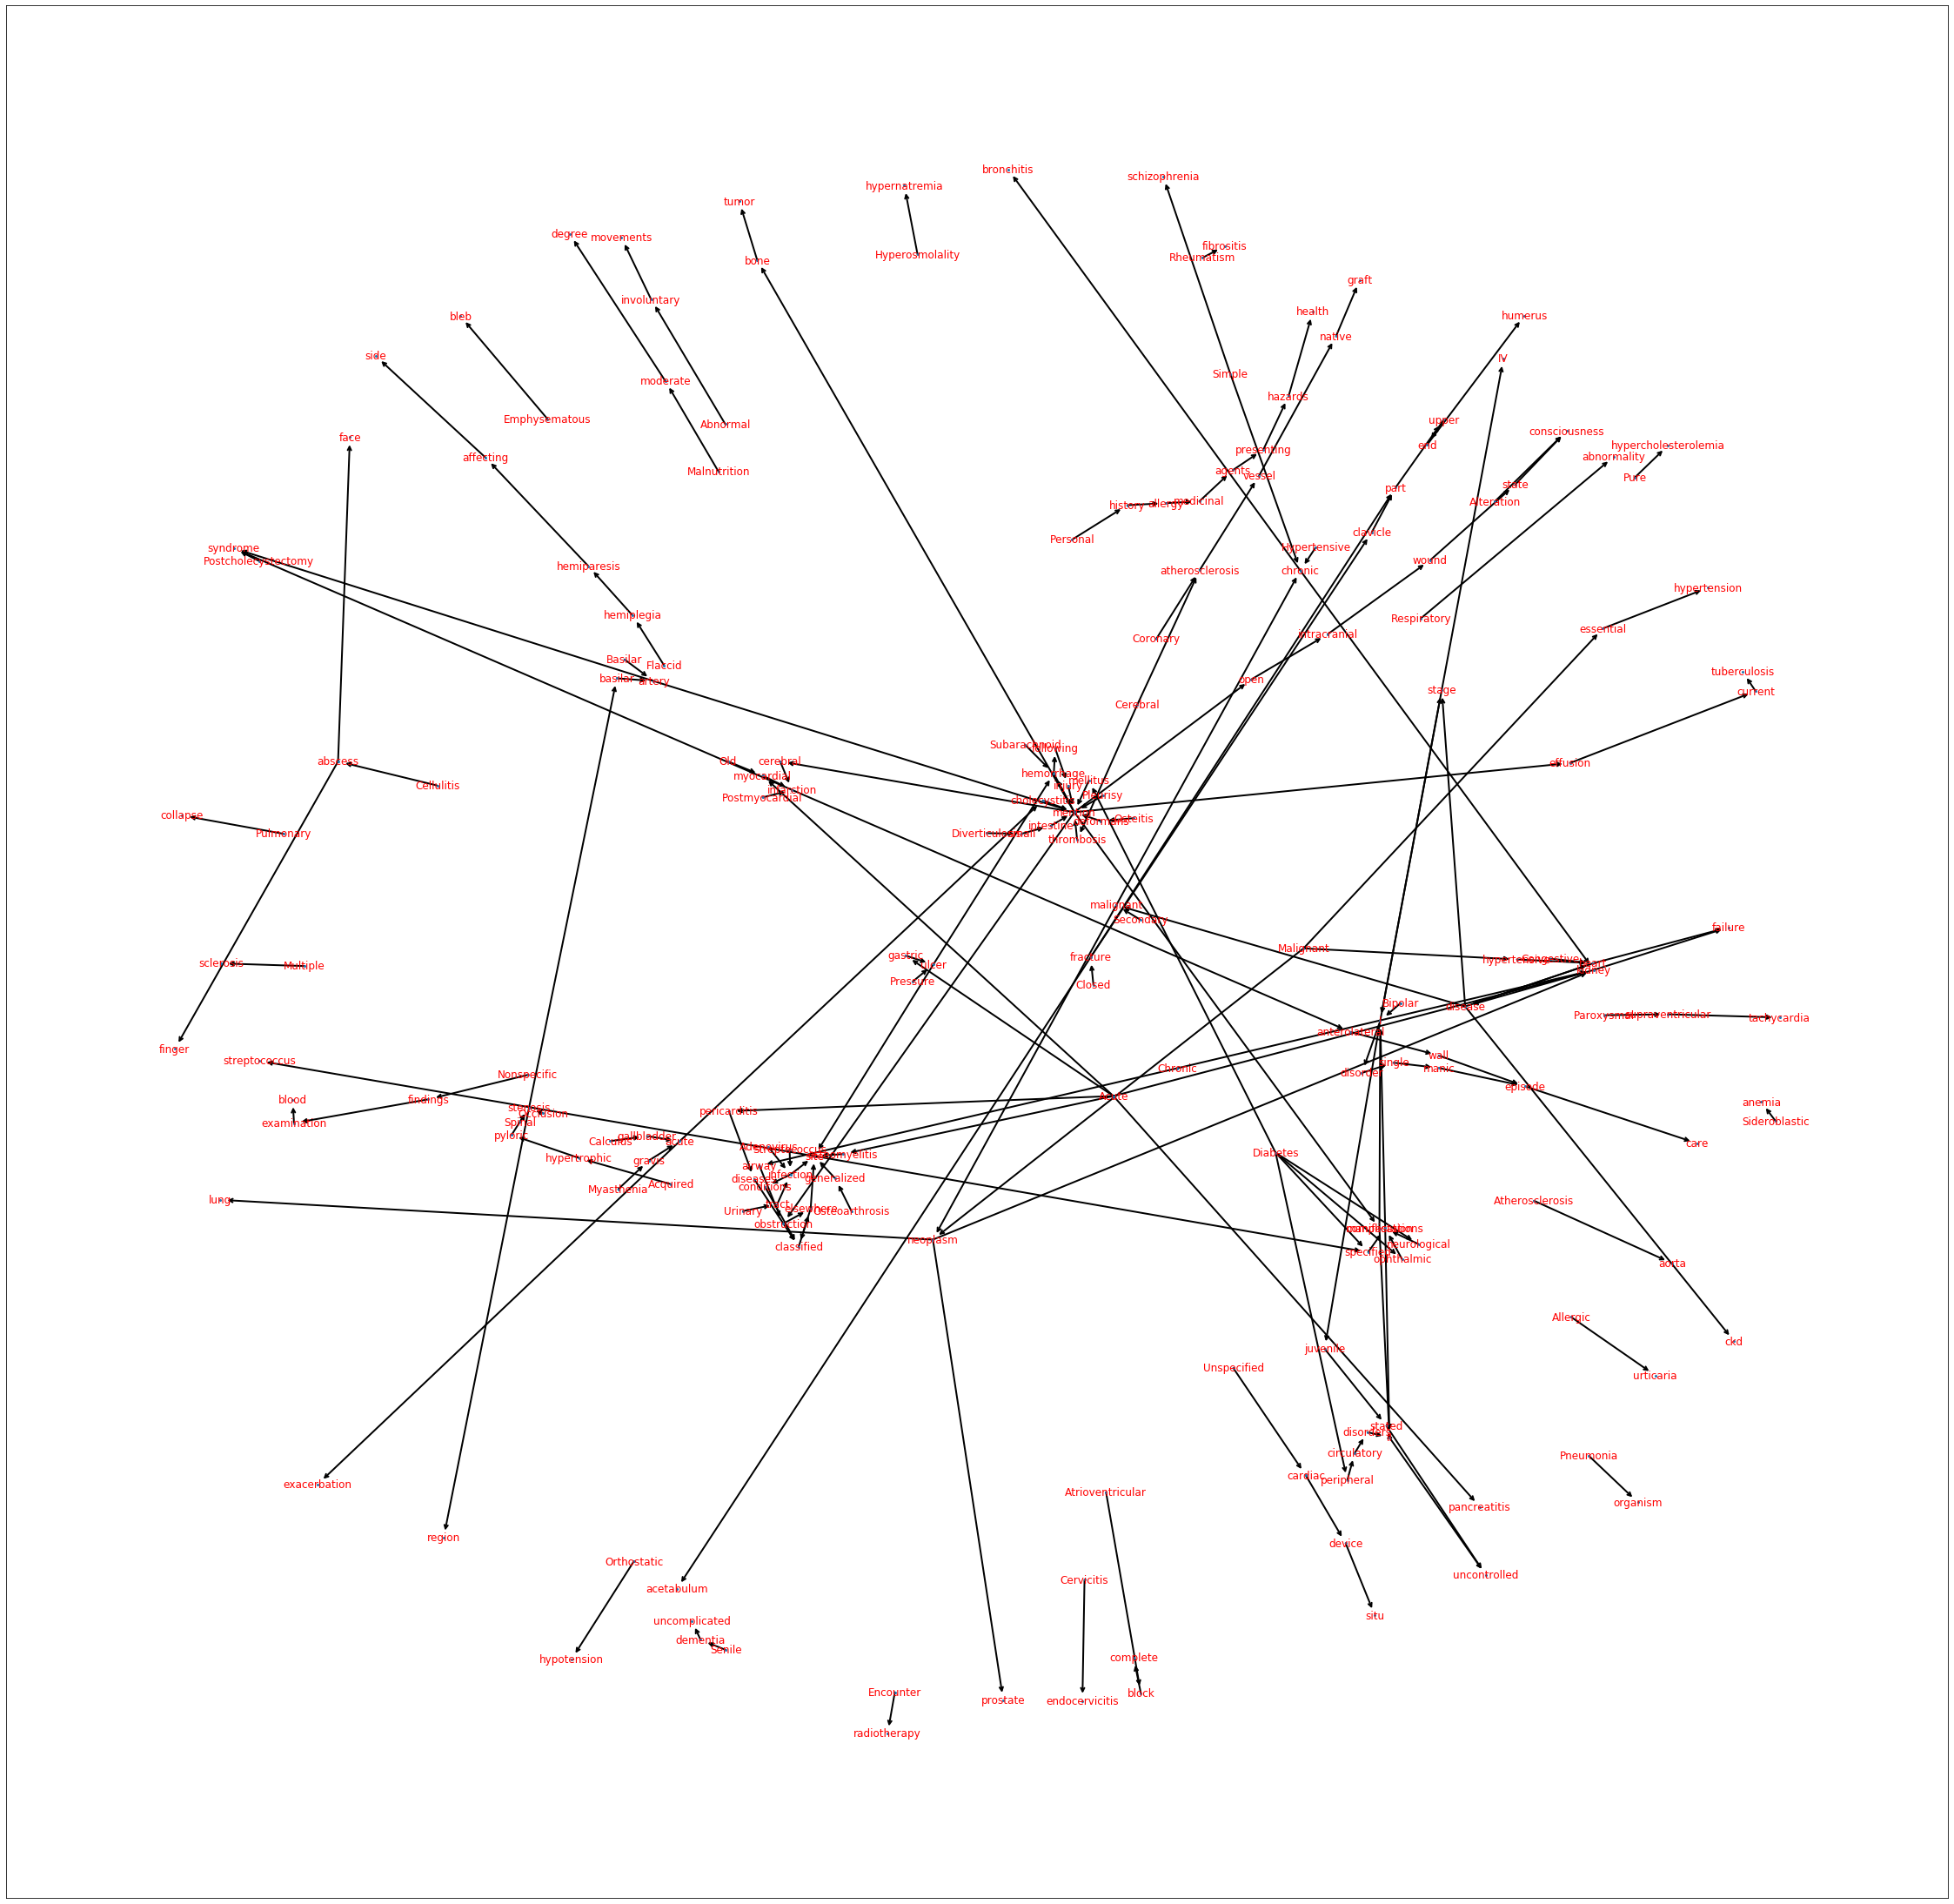

In [131]:
plt.figure(figsize=(40,40))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=4)
nx.draw_networkx_labels(G, pos, font_color="red")
nx.draw_networkx_edges(G, pos, arrowstyle='->',
                               arrowsize=10, width=2)

In [112]:
[n.out_edges for n,d in G.nodes(data=True)]

AttributeError: 'str' object has no attribute 'out_edges'

In [93]:
diagnoses = list(set(X[1:,-3])|set(X[1:,-2])|set(X[1:,-1]))

In [104]:
[lem.lemmatize(w) for w in tokenizer.tokenize(str(diagnoses[0])) if not w in stop_words]

['nan']

In [105]:
diags = []
for d in diagnoses:
    diags.append([lem.lemmatize(w) for w in tokenizer.tokenize(str(d)) if not w in stop_words])

In [120]:
w2v = Word2Vec(diags, min_count=1)

In [124]:
print(list(w2v.wv.vocab))

['nan', 'Anal', 'rectal', 'polyp', 'Malignant', 'neoplasm', 'vagina', 'Extrinsic', 'asthma', 'unspecified', 'Diabetes', 'neurological', 'manifestation', 'type', 'II', 'stated', 'uncontrolled', 'Leukoplakia', 'penis', 'Adrenal', 'cortical', 'steroid', 'causing', 'adverse', 'effect', 'therapeutic', 'use', 'Abrasion', 'friction', 'burn', 'face', 'neck', 'scalp', 'except', 'eye', 'without', 'mention', 'infection', 'corpus', 'uterus', 'isthmus', 'Family', 'history', 'psychiatric', 'condition', 'Poisoning', 'adrenal', 'Fall', 'resulting', 'striking', 'sharp', 'object', 'Open', 'wound', 'hip', 'thigh', 'complication', 'Acute', 'ill', 'defined', 'cerebrovascular', 'disease', 'Fracture', 'medial', 'malleolus', 'closed', 'Seminal', 'vesiculitis', 'Adenovirus', 'classified', 'elsewhere', 'site', 'coma', 'finger', 'ketoacidosis', 'I', 'juvenile', 'oxazolidine', 'derivative', 'Intracerebral', 'hemorrhage', 'Postcholecystectomy', 'syndrome', 'Closed', 'fracture', 'clavicle', 'part', 'Other', 'unknow

In [122]:
from sklearn.manifold import TSNE

In [ ]:
TSNE(n_components=2).fit_transform(X)

In [130]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

In [133]:
X = w2v[w2v.wv.vocab]
pca = PCA(n_components=2)
tsne = TSNE(n_components=2)
result = pca.fit_transform(X)
result2 = tsne.fit_transform(X)

/home/vescovo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


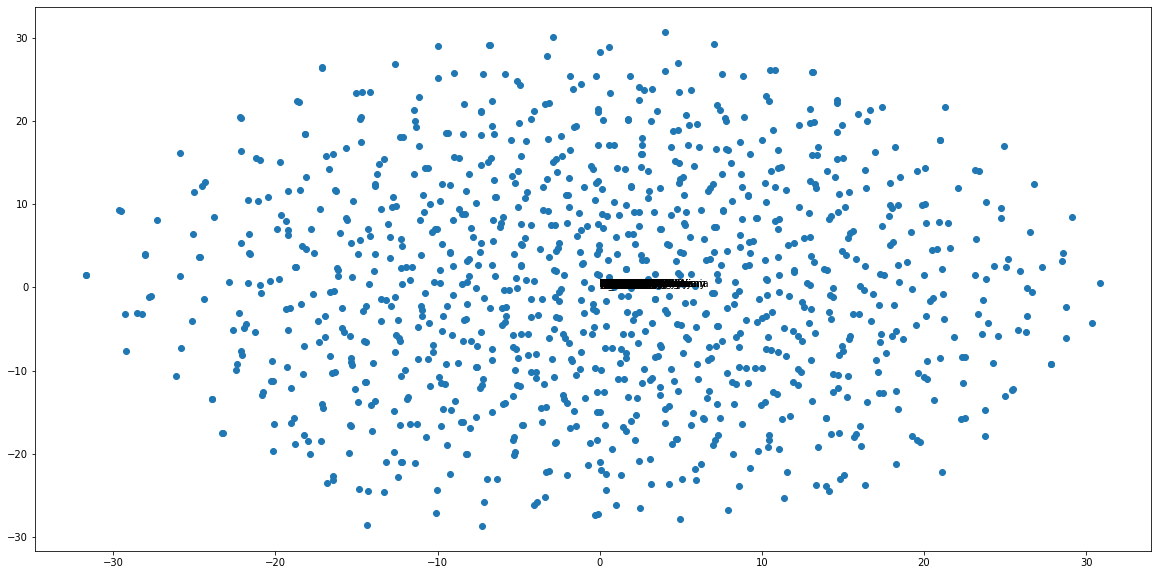

In [134]:
plt.figure(figsize=(20,10))
plt.scatter(result2[:, 0], result2[:, 1])
words = list(w2v.wv.vocab)
for i, word in enumerate(words):
	plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

In [136]:
print(X.shape)

(1057, 100)


In [78]:
m = {'me':1}

In [81]:
m.setdefault(0)

In [86]:
m.get('mee') == None

True

In [147]:
np.asarray([1,2,3,4,5])[-2:]

array([4, 5])